In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

print(df.count())

Area               13611
Perimeter          13611
MajorAxisLength    13611
MinorAxisLength    13611
AspectRation       13611
Eccentricity       13611
ConvexArea         13611
EquivDiameter      13611
Extent             13611
Solidity           13611
roundness          13611
Compactness        13611
ShapeFactor1       13611
ShapeFactor2       13611
ShapeFactor3       13611
ShapeFactor4       13611
Class              13611
dtype: int64


In [3]:
print(df.columns.values)

['Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation'
 'Eccentricity' 'ConvexArea' 'EquivDiameter' 'Extent' 'Solidity'
 'roundness' 'Compactness' 'ShapeFactor1' 'ShapeFactor2' 'ShapeFactor3'
 'ShapeFactor4' 'Class']


#Part A (Analyzing the distribution)

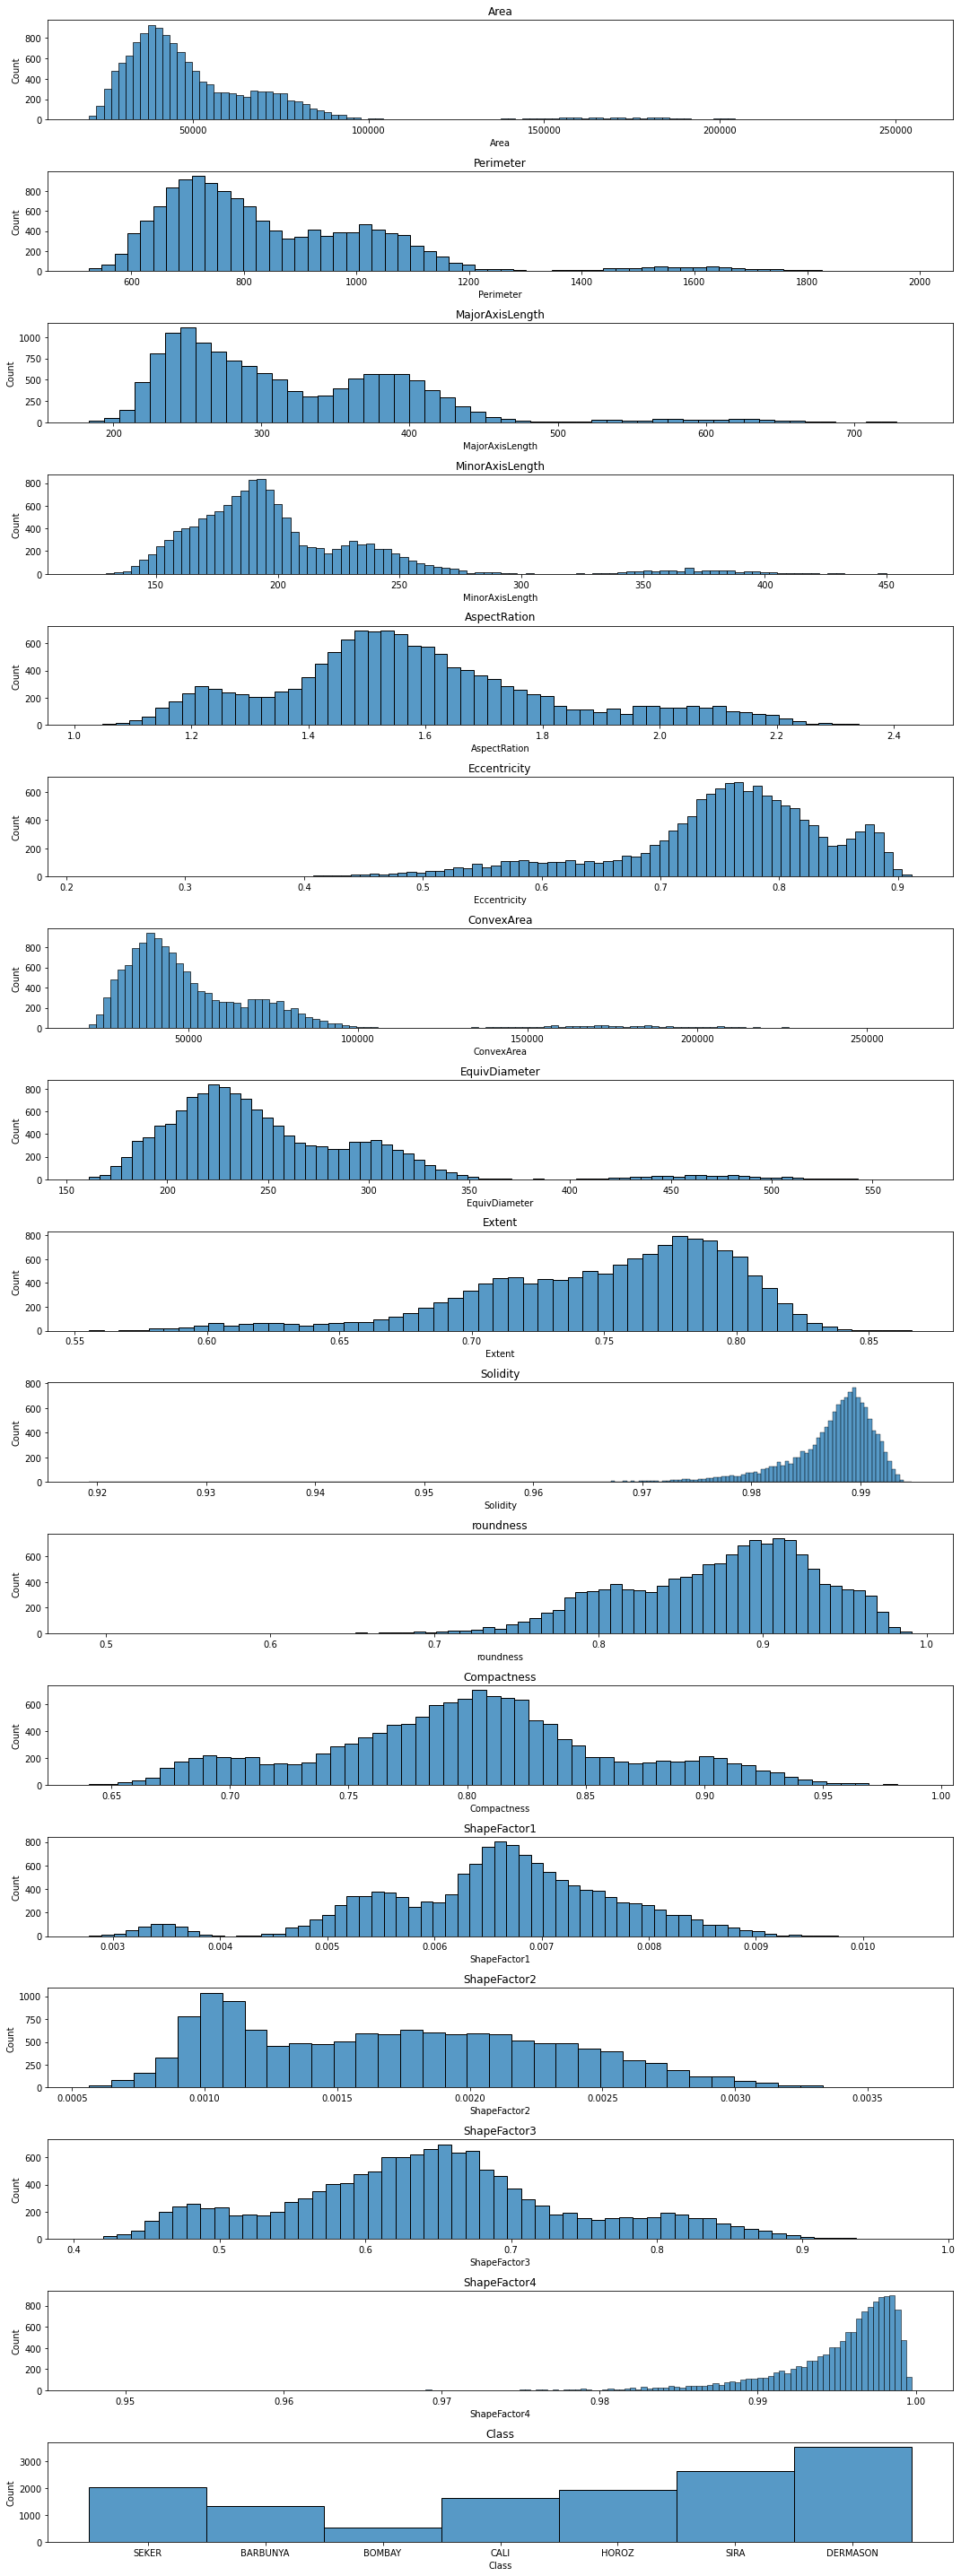

In [4]:
plt.figure(figsize=(15,40))
l = df.columns.values
for i in range(17):
  plt.subplot(17, 1, i+1)
  sns.histplot(df[l[i]]) #displot (distplot)
  plt.title(df.columns[i])
  
plt.tight_layout()

#Exploratory Data Analysis

####Pair Plot

In [12]:
# sns.pairplot(df, hue = 'Class', palette='gist_earth')
# plt.show()

#### Plotting the  data set

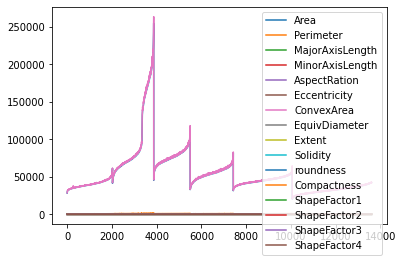

In [5]:
df.plot()
plt.show()

####Exploring the data values

In [6]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
df.shape

(13611, 17)

In [8]:
df.info()
##Hence no Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


####HeatMap of Correlation between different Values

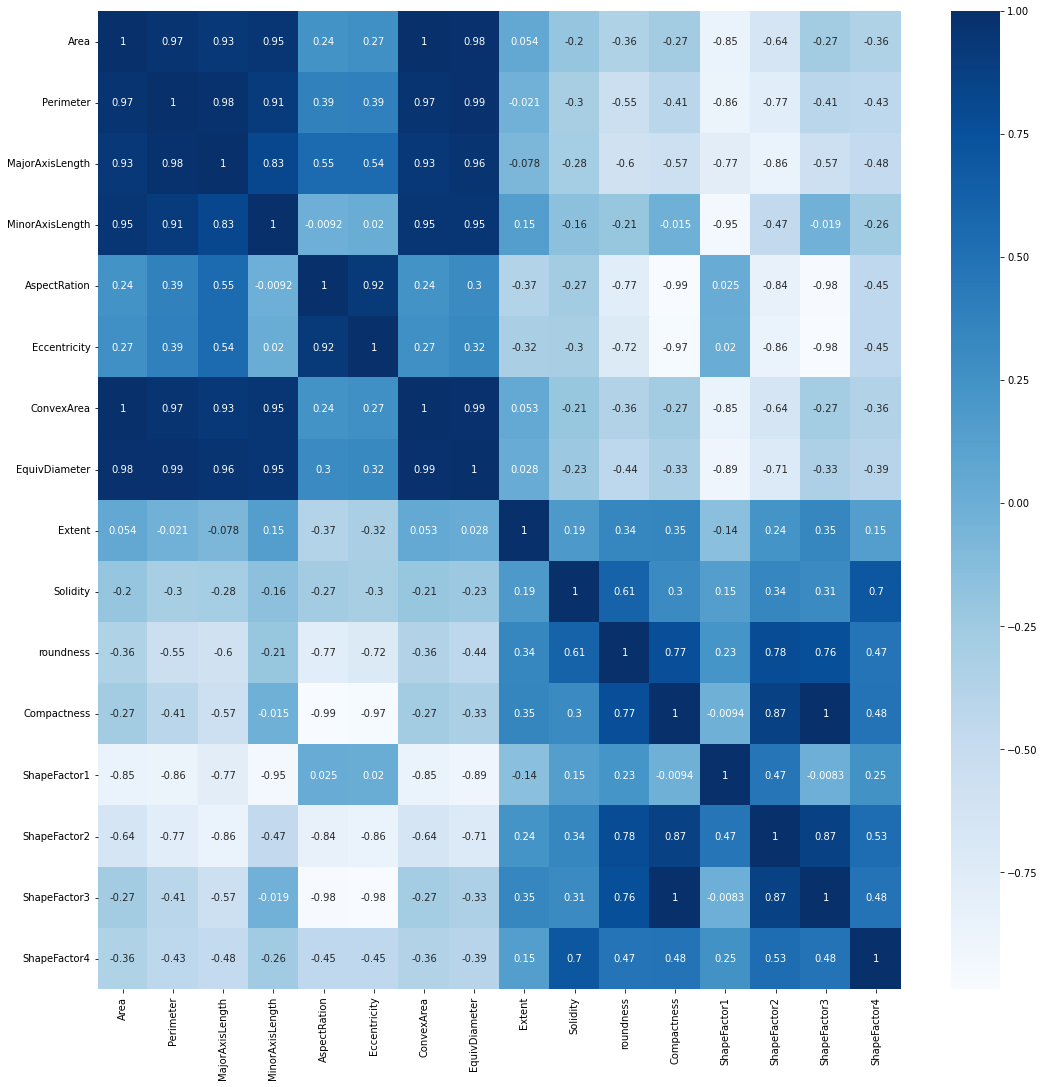

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as npb
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

####*BOX* PLOT ACROSS THE GIVEN DATASET

['Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation'
 'Eccentricity' 'ConvexArea' 'EquivDiameter' 'Extent' 'Solidity'
 'roundness' 'Compactness' 'ShapeFactor1' 'ShapeFactor2' 'ShapeFactor3'
 'ShapeFactor4' 'Class']
17
16.9375


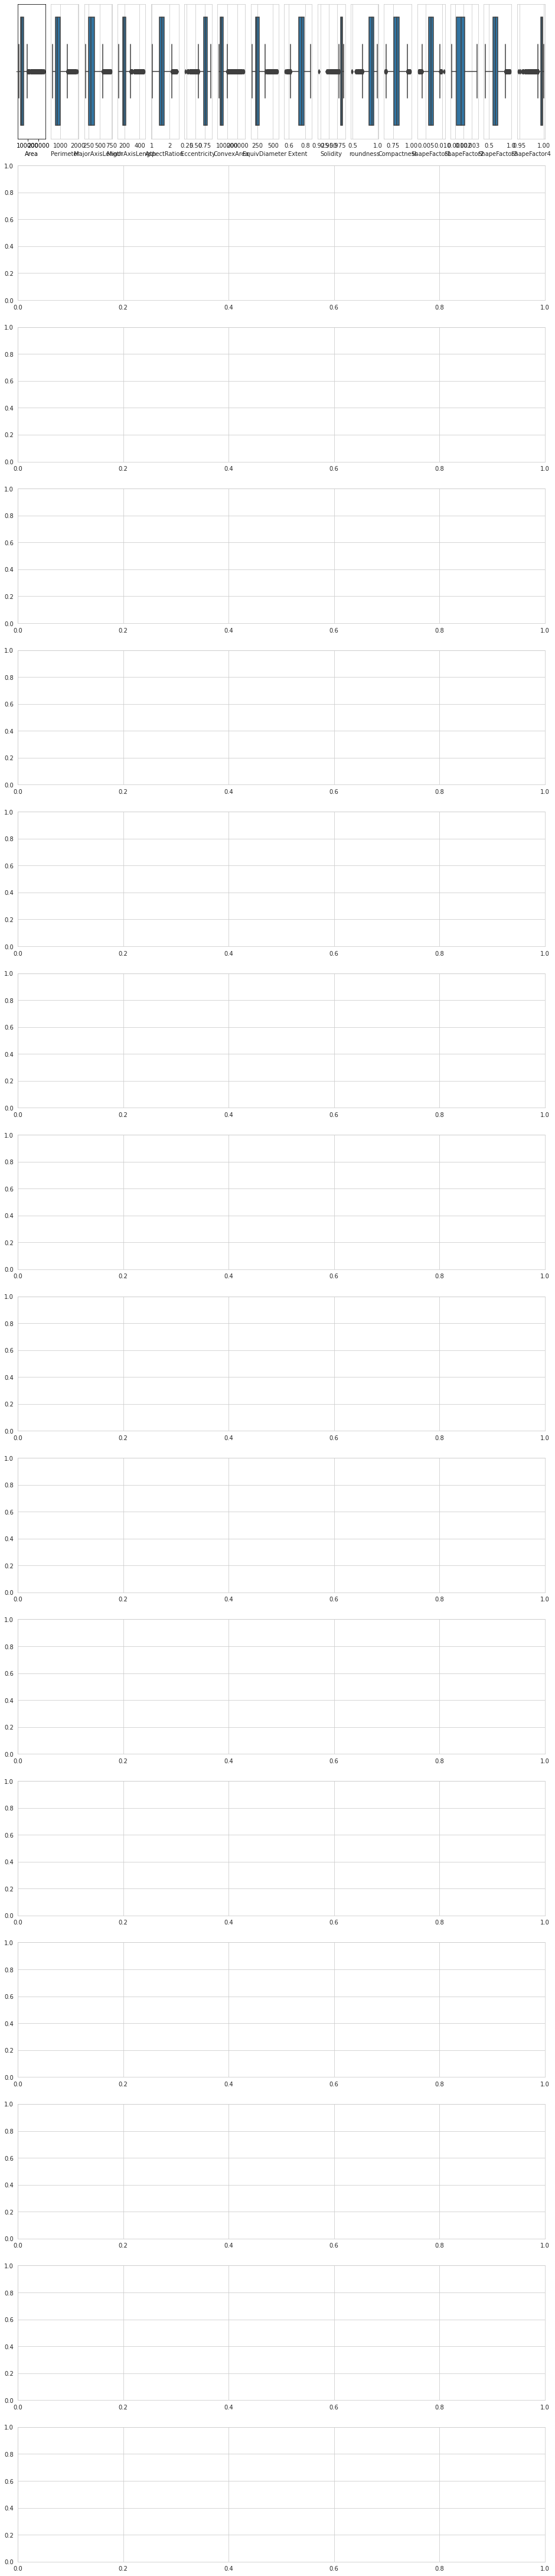

In [23]:
l = df.columns.values
print(l)
print(len(l))
number_of_columns = 16
number_of_rows = len(l)- 1 /number_of_columns
print(number_of_rows)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(17, 1, i+1,)
    plt.subplot(number_of_rows + 1,number_of_columns,i+1,adjustable = 'box')
    sns.set_style('whitegrid')
    sns.boxplot(x = l[i], data = df)

####SCATTER PLOT across class


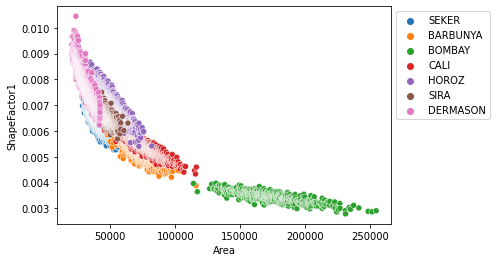

['Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation'
 'Eccentricity' 'ConvexArea' 'EquivDiameter' 'Extent' 'Solidity'
 'roundness' 'Compactness' 'ShapeFactor1' 'ShapeFactor2' 'ShapeFactor3'
 'ShapeFactor4' 'Class']
16.9375


<Figure size 1152x6097.5 with 0 Axes>

<Figure size 1152x6097.5 with 0 Axes>

In [12]:
##Example of the plot
sns.scatterplot(x='Area', y='ShapeFactor1',
                hue='Class', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

l = df.columns.values
print(l)
number_of_rows = len(l)- 1 /16
print(number_of_rows)
plt.figure(figsize=(16,5*number_of_rows))
  

#Part-C Reducing Dimensions using TSNE

T-SNE is helpful since it preserves the clusters 
Well Explained Video : https://www.youtube.com/watch?v=NEaUSP4YerM

In [16]:
from sklearn.manifold import TSNE
%matplotlib inline

In [19]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50,n_iter = 4000)
#The perplexity value can be changed along with the learning rate for this specific question
tsne_results = tsne.fit_transform(df.drop(columns=['Class']))

In [21]:
tsnestacked = np.vstack((tsne_results.T, df.Class)).T
tsne_df = pd.DataFrame(tsnestacked, columns = ['TSNE_A','TSNE_B','CLASS'])
df_Class = df.Class

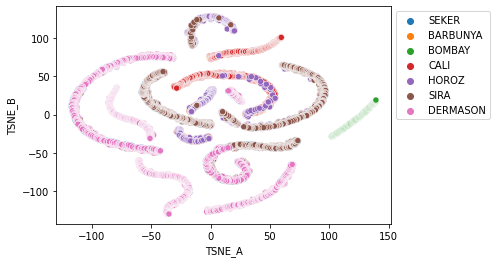

In [22]:
sns.scatterplot(x='TSNE_A', y='TSNE_B', hue=df.Class, data=tsne_df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

# Part D (Naive Bayes Implementation)

Naive Bayes Algorithm :

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
shuffled_df = df.sample(frac = 1, random_state = 50)
train_df, test_df = shuffled_df[:10888], shuffled_df[10888:]

In [25]:
train_x_df = train_df.drop("Class", axis=1)
train_y_df = train_df["Class"].copy()

test_x_df = test_df.drop("Class", axis=1)
test_y_df = test_df["Class"].copy()

####Further training of model

####Gaussian Naive Bayes :

In [26]:
from sklearn.metrics import classification_report

gnb = GaussianNB()
y_pred = gnb.fit(train_x_df, train_y_df).predict(test_x_df)
print(classification_report(test_y_df, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.66      0.52      0.59       246
      BOMBAY       1.00      1.00      1.00       101
        CALI       0.69      0.81      0.75       325
    DERMASON       0.89      0.83      0.86       716
       HOROZ       0.81      0.78      0.80       404
       SEKER       0.69      0.72      0.71       406
        SIRA       0.73      0.79      0.76       525

    accuracy                           0.77      2723
   macro avg       0.78      0.78      0.78      2723
weighted avg       0.78      0.77      0.77      2723



####Multinomial Naives Bayes Algorithm

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
MNBA = MultinomialNB()
y_pred = MNBA.fit(train_x_df, train_y_df).predict(test_x_df)
print(classification_report(test_y_df, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.64      0.65      0.64       246
      BOMBAY       1.00      1.00      1.00       101
        CALI       0.77      0.77      0.77       325
    DERMASON       0.88      0.83      0.85       716
       HOROZ       0.85      0.79      0.82       404
       SEKER       0.76      0.76      0.76       406
        SIRA       0.72      0.81      0.76       525

    accuracy                           0.79      2723
   macro avg       0.80      0.80      0.80      2723
weighted avg       0.80      0.79      0.79      2723



####BernoulliNB

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report


BNB = BernoulliNB()
y_pred = BNB.fit(train_x_df, train_y_df).predict(test_x_df)
print(classification_report(test_y_df, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       246
      BOMBAY       0.00      0.00      0.00       101
        CALI       0.00      0.00      0.00       325
    DERMASON       0.26      1.00      0.42       716
       HOROZ       0.00      0.00      0.00       404
       SEKER       0.00      0.00      0.00       406
        SIRA       0.00      0.00      0.00       525

    accuracy                           0.26      2723
   macro avg       0.04      0.14      0.06      2723
weighted avg       0.07      0.26      0.11      2723



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Part E (Principal Component Analysis + Model)

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize
import numpy as np

pca = PCA(n_components = 12)
pca_shuffled = pca.fit_transform(shuffled_df.drop("Class", axis=1))
print(pca.explained_variance_)
print()
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())


[1.74644972e+09 5.34739910e+04 3.35524185e+03 4.00701543e+02
 4.31384694e+01 6.23962925e-01 2.03960298e-03 1.30506142e-03
 2.08216364e-04 5.58770144e-05 1.26183291e-05 2.09318958e-06]

[9.99967207e-01 3.06176794e-05 1.92111562e-06 2.29430254e-07
 2.46998550e-08 3.57263342e-10 1.16781839e-12 7.47240882e-13
 1.19218741e-13 3.19935819e-14 7.22489472e-15 1.19850055e-15]

[0.99996721 0.99999782 0.99999975 0.99999997 1.         1.
 1.         1.         1.         1.         1.         1.        ]


####Train 

In [85]:
from sklearn.model_selection import train_test_split
# pdf = pd.DataFrame(pca_shuffled, columns = ['TC1','TC2','TC3','TC4']) #Converting to a dataframe
pdf = pd.DataFrame(pca_shuffled, columns = ['TC1','TC2','TC3','TC4','TC5','TC6','TC7','TC8','TC9','TC10','TC11','TC12']) #Converting to a dataframe
train_df, test_df = pdf[:10888], pdf[10888:]

In [86]:
train_x_df = train_df
train_y_df = shuffled_df[:10888]["Class"].copy()
# print(train_x_df)
test_x_df = test_df
test_y_df = shuffled_df[10888:]["Class"].copy()
# print(test_x_df)

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB() 

y_pred = gnb.fit(train_x_df, train_y_df).predict(test_x_df)
y_prob = gnb.predict_proba(test_x_df)

print(classification_report(test_y_df, y_pred))


              precision    recall  f1-score   support

    BARBUNYA       0.90      0.85      0.88       246
      BOMBAY       0.99      1.00      1.00       101
        CALI       0.84      0.95      0.89       325
    DERMASON       0.94      0.85      0.89       716
       HOROZ       0.95      0.90      0.92       404
       SEKER       0.93      0.89      0.91       406
        SIRA       0.78      0.89      0.83       525

    accuracy                           0.89      2723
   macro avg       0.90      0.90      0.90      2723
weighted avg       0.89      0.89      0.89      2723



In [71]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

BNB = BernoulliNB()
y_pred = BNB.fit(train_x_df, train_y_df).predict(test_x_df)
# y_prob = BNB.predict_proba(test_x_df)


print(classification_report(test_y_df, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.83      0.81      0.82       246
      BOMBAY       0.80      0.91      0.85       101
        CALI       0.78      0.87      0.82       325
    DERMASON       0.86      0.85      0.85       716
       HOROZ       0.93      0.84      0.88       404
       SEKER       0.81      0.89      0.85       406
        SIRA       0.80      0.73      0.76       525

    accuracy                           0.83      2723
   macro avg       0.83      0.84      0.84      2723
weighted avg       0.84      0.83      0.83      2723



#ROC-AUC Curve

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       406
           1       0.66      0.52      0.59       246
           2       1.00      1.00      1.00       101
           3       0.69      0.81      0.75       325
           4       0.81      0.78      0.80       404
           5       0.73      0.79      0.76       525
           6       0.89      0.83      0.86       716

    accuracy                           0.77      2723
   macro avg       0.78      0.78      0.78      2723
weighted avg       0.78      0.77      0.77      2723



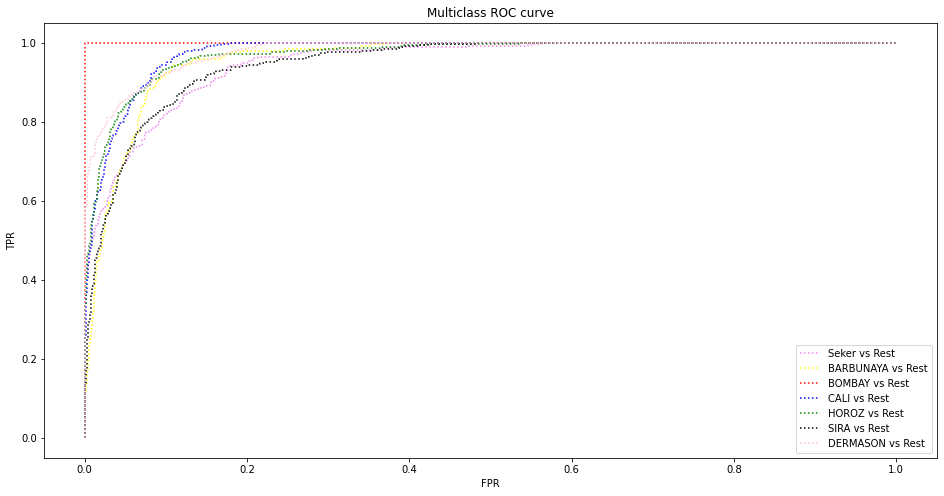

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize
import numpy as np


fpr = {}
tpr = {}
w = {}

#Since to give the value tpr, we have to create the value classes into a number, and then we plot ROC_AUC

shuffled_df = df.sample(frac = 1, random_state = 50)

new_y = [];                  
for i in shuffled_df['Class']:
    if (i=='SEKER'):
        new_y.append(0)
    elif (i=='BARBUNYA'):
        new_y.append(1)
    elif(i=='BOMBAY'):
        new_y.append(2)
    elif(i=='CALI'):
        new_y.append(3)
    elif(i=='HOROZ'):
        new_y.append(4)
    elif(i=='SIRA'):
        new_y.append(5)
    elif(i=='DERMASON'):
        new_y.append(6)

train_df, test_df = shuffled_df[:10888], shuffled_df[10888:]
train_x_df = train_df.drop("Class", axis=1)
train_y_df = new_y[:10888]

test_x_df = test_df.drop("Class", axis=1)
test_y_df = new_y[10888:]

gnb = GaussianNB()
y_pred = gnb.fit(train_x_df, train_y_df).predict(test_x_df)
print(classification_report(test_y_df, y_pred))
y_prob = gnb.predict_proba(test_x_df)

for i in range(0,7):
    fpr[i], tpr[i],w[i] = roc_curve(test_y_df,y_prob[:,i],pos_label=i)

plt.figure(figsize=(16,8))
plt.plot(fpr[0], tpr[0], linestyle='dotted',color='violet', label='Seker vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dotted',color='yellow', label='BARBUNAYA vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dotted',color='red', label='BOMBAY vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='blue', label='CALI vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='dotted',color='green', label='HOROZ vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='dotted',color='black', label='SIRA vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='dotted',color='pink', label='DERMASON vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')  

#Logistic Regression

In [ ]:
#Can use l2, newton-cg : will give 90.6 percent accuracy!
#Can use l1, liblinear (will be give 90.1 accuracy

#Hence, its better to use the newton_cg baesd parameters for better results##

#l2, sag : 67 percent accuracy
#l2, saga : 62 percent accuracy

#l1 works better in the case with more outliers than l2.

# SizeofTestset = test_x_df.shape[0]
# mislabelledset = (test_y_df != y_pred).sum()
# print("Number of mislabeled points out of a total %d points : %d"% (SizeofTestset,mislabelledset))
# accuracy =100-((mislabelledset/SizeofTestset)*100)
# print("Accuracy of the data set is :", accuracy)

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=10000,penalty = 'l2',solver = 'newton-cg',multi_class = "multinomial")
y_pred = LR.fit(train_x_df, train_y_df).predict(test_x_df)

print(classification_report(test_y_df, y_pred))

#Logistic Regression

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       246
      BOMBAY       1.00      1.00      1.00       101
        CALI       0.93      0.94      0.94       325
    DERMASON       0.92      0.91      0.91       716
       HOROZ       0.96      0.96      0.96       404
       SEKER       0.94      0.93      0.94       406
        SIRA       0.83      0.87      0.85       525

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
